# Membaca Data Excel

In [2]:
import pandas as pd
Data_Cluster = 'Data Cluster Sosial Ekonomi.xlsx'
Data_Cluster = pd.read_excel(Data_Cluster)
Data = Data_Cluster.iloc[:,1:5]
print(Data[:10])

   Pers.Pend.Miskin (%)  Tingkat.Peng.Terbuka (%)   Peng.Perkapita   IPM 
0                 14.64                      6.070            9963  72.80
1                  8.42                      5.815           10848  72.71
2                  5.92                      6.225           11130  73.26
3                  6.78                      4.385           11158  73.52
4                  7.62                      4.645           10871  72.14
5                 11.90                      4.685           11109  70.90
6                 14.62                      3.490           10840  72.16
7                 11.57                      4.415           10336  70.45
8                  4.45                      4.475           13358  72.24
9                  6.24                      8.125           14469  76.46


In [3]:
Stat_desk = Data.describe()
print(Stat_desk)

       Pers.Pend.Miskin (%)  Tingkat.Peng.Terbuka (%)   Peng.Perkapita  \
count             34.000000                  34.000000       34.000000   
mean              10.243235                   5.044559    11079.558824   
std                5.248208                   1.536644     2246.727859   
min                4.450000                   2.725000     7146.000000   
25%                6.257500                   3.978750     9699.000000   
50%                8.525000                   4.665000    10990.000000   
75%               12.222500                   6.006250    11858.500000   
max               26.560000                   8.330000    18927.000000   

            IPM   
count  34.000000  
mean   71.968235  
std     3.900750  
min    61.390000  
25%    70.235000  
50%    72.195000  
75%    73.225000  
max    81.650000  


# Pengujian Asumsi

In [4]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 18.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=2b011de531c850e78105bccd17fe5e8b139ae1446cc138d3490bd6a31d487541
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [5]:
# UJI KMO
from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(Data)
# Menampilkan hasil KMO
print("Nilai KMO:", kmo_model)
if kmo_model > 0.5:
    print("Sampel Representatif")
else:
    print("Sampel Tidak Representatif")

Nilai KMO: 0.7408707625504555
Sampel Representatif


In [6]:
!pip install statsmodels

In [7]:
# UJI NON MULTIKOLINEARITAS
import seaborn as sns
import matplotlib.pyplot as plt

korelasi = Data.corr()
print(korelasi)

                           Pers.Pend.Miskin (%)  Tingkat.Peng.Terbuka (%)   \
Pers.Pend.Miskin (%)                   1.000000                  -0.388368   
Tingkat.Peng.Terbuka (%)              -0.388368                   1.000000   
Peng.Perkapita                        -0.615360                   0.433764   
IPM                                   -0.669781                   0.488225   

                           Peng.Perkapita      IPM   
Pers.Pend.Miskin (%)            -0.615360 -0.669781  
Tingkat.Peng.Terbuka (%)         0.433764  0.488225  
Peng.Perkapita                   1.000000  0.877839  
IPM                              0.877839  1.000000  


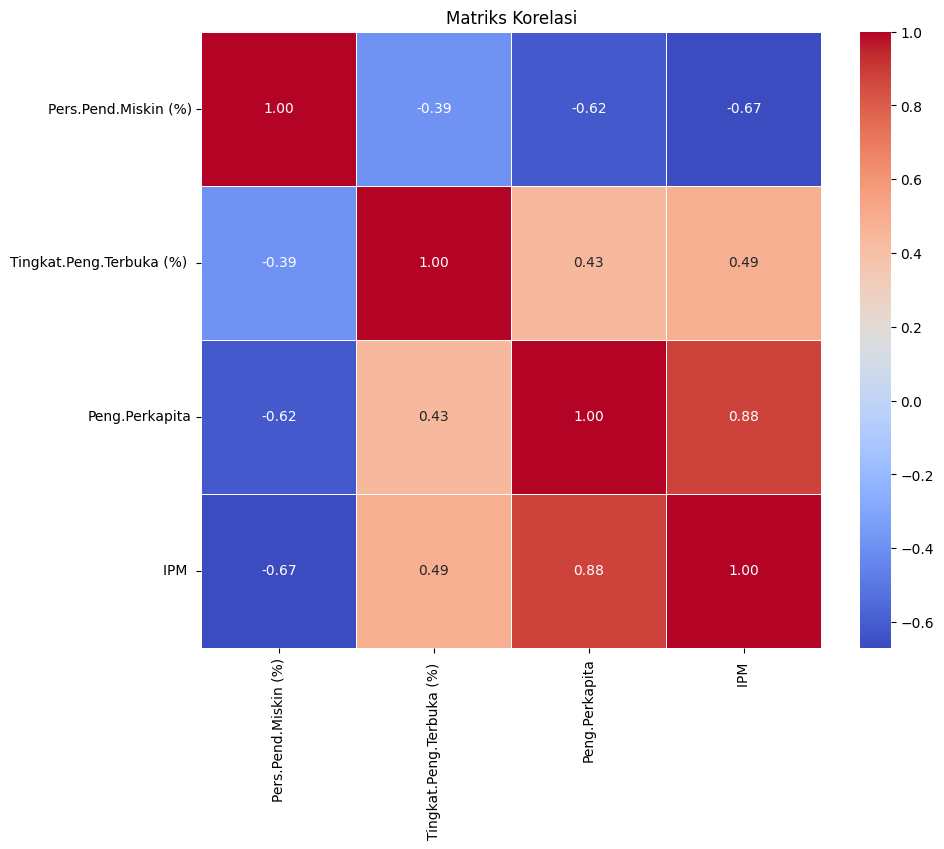

In [8]:
# Membuat visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

# Data Prepocessing

In [9]:
from sklearn.preprocessing import StandardScaler

data_standard = StandardScaler()
data_standard = data_standard.fit_transform(Data)
data_standard[:10]

array([[ 0.85036359,  0.67736045, -0.50444477,  0.21643867],
       [-0.35262586,  0.50891889, -0.10461485,  0.19301921],
       [-0.83614252,  0.7797465 ,  0.02278858,  0.33613813],
       [-0.66981278, -0.43567498,  0.03543856,  0.40379434],
       [-0.50735119, -0.26393064, -0.09422379,  0.04469596],
       [ 0.32042933, -0.23750843,  0.01330109, -0.27797215],
       [ 0.84649546, -1.02687184, -0.10822914,  0.04990029],
       [ 0.25660514, -0.41585832, -0.33592889, -0.39506945],
       [-1.12045031, -0.37622501,  1.02936605,  0.07071758],
       [-0.77425238,  2.03480128,  1.53129942,  1.16883002]])

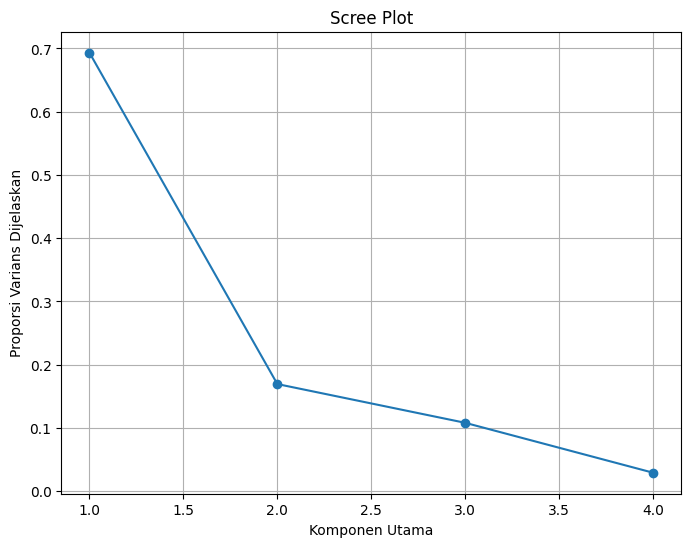

In [10]:
# ANALISIS PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inisialisasi objek PCA
pca = PCA()

# Fit dan transformasi data ke dalam komponen utama
data_pca = pca.fit_transform(data_standard)

# Menghitung proporsi varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_

# Membuat scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Komponen Utama')
plt.ylabel('Proporsi Varians Dijelaskan')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [11]:
# Menentukan jumlah komponen yang relevan
# Jumlah total varian (80%)
total_var = 0.8
cumulative_variance = 0
num_components = 0

for variance in explained_variance_ratio:
    cumulative_variance += variance
    num_components += 1
    if cumulative_variance >= total_var:
        break

# Analisis PCA dengan jumlah komponen yang relevan
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_standard)

# Membuat dataframe baru dengan hasil PCA
data_pca_df = pd.DataFrame(data_pca, columns=[f'Komponen Utama {i+1}' for i in range(num_components)])

# Tampilkan hasil dataframe baru
print(data_pca_df[:10])

   Komponen Utama 1  Komponen Utama 2
0         -0.299241          0.925658
1          0.423211          0.365803
2          0.914268          0.431574
3          0.399825         -0.654552
4          0.116755         -0.358219
5         -0.397905         -0.087606
6         -0.846499         -0.704287
7         -0.692190         -0.160613
8          0.994874         -0.900541
9          2.663412          1.076529


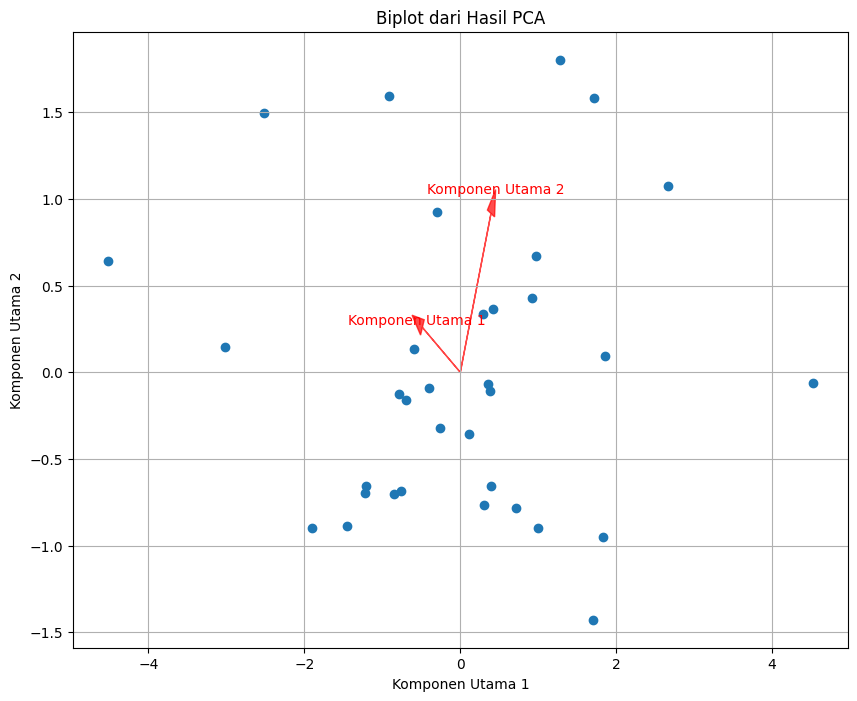

In [12]:
# Visualisasi data hasil PCA
import seaborn as sns

# Visualisasi data hasil PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_df['Komponen Utama 1'], data_pca_df['Komponen Utama 2'])

for i, var in enumerate(data_pca_df.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.7, head_width=0.1)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, var, color='r', ha='center', va='center')

plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Biplot dari Hasil PCA')
plt.grid()
plt.show()

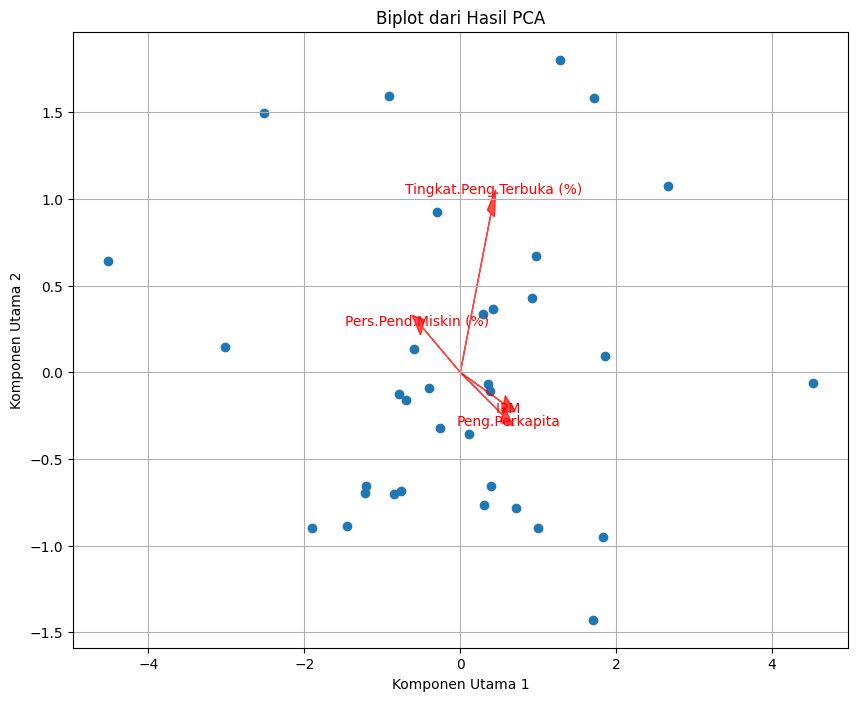

                  Pers.Pend.Miskin (%)  Tingkat.Peng.Terbuka (%)   \
Komponen Utama 1             -0.486243                   0.393575   
Komponen Utama 2              0.258975                   0.916425   

                  Peng.Perkapita      IPM   
Komponen Utama 1        0.542557  0.560623  
Komponen Utama 2       -0.245573 -0.181083  


In [31]:
# Membuat dataframe baru dengan hasil PCA
data_pca_df = pd.DataFrame(data_pca, columns=['Komponen Utama 1', 'Komponen Utama 2'])

# Mendapatkan vektor komponen PCA
pca_components = pca.components_

# Membuat dataframe baru dengan vektor komponen dan nama variabel sebagai kolom
pca_components_df = pd.DataFrame(pca_components, columns=Data.columns, index=['Komponen Utama 1', 'Komponen Utama 2'])

# Visualisasi data hasil PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_df['Komponen Utama 1'], data_pca_df['Komponen Utama 2'])

for i, var in enumerate(Data.columns):
    plt.arrow(0, 0, pca_components_df[var][0], pca_components_df[var][1], color='r', alpha=0.7, head_width=0.1)
    plt.text(pca_components_df[var][0] * 1.15, pca_components_df[var][1] * 1.15, var, color='r', ha='center', va='center')

plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Biplot dari Hasil PCA')
plt.grid()
plt.show()

# Outputkan dataframe yang berisi vektor komponen dan nama variabel
print(pca_components_df)

# ANALISIS K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

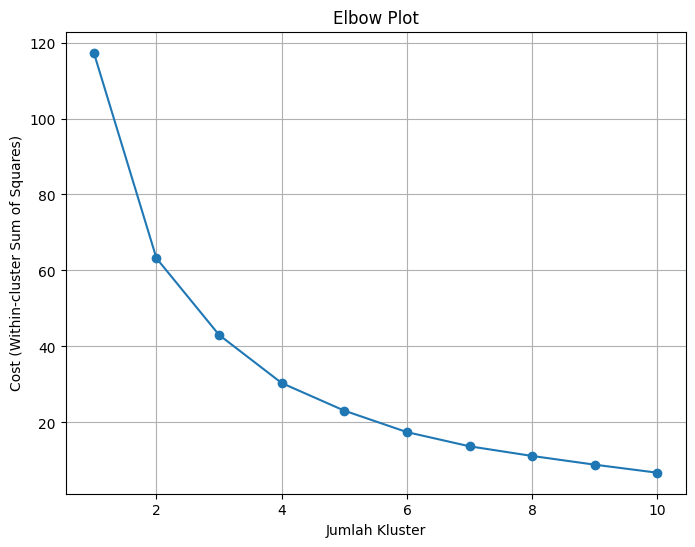

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Mencari nilai inersia untuk berbagai jumlah cluster
wcss = []
num_clusters = range(1, 11) # Jumlah cluster dari 1 hingga 10
for i in num_clusters:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_pca_df)
  wcss.append(kmeans.inertia_)

# Membuat Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, wcss, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Cost (Within-cluster Sum of Squares)')
plt.title('Elbow Plot')
plt.grid()
plt.show()


In [41]:
# Menentukan jumlah kluster yang optimal berdasarkan Elbow Plot
num_clusters_optimal = 3  # Ganti dengan jumlah kluster optimal yang Anda temukan dari Elbow Plot

# Melakukan K-Means clustering dengan jumlah kluster optimal
kmeans = KMeans(n_clusters=num_clusters_optimal, random_state=42)
clusters = kmeans.fit_predict(data_pca_df)

# Menambahkan kolom "Cluster" ke dalam dataframe
data_clustered = Data.copy()
data_clustered['Cluster'] = clusters

# Tampilkan hasil dataframe dengan kolom Cluster
print(data_clustered)


    Pers.Pend.Miskin (%)  Tingkat.Peng.Terbuka (%)   Peng.Perkapita   IPM   \
0                  14.64                      6.070            9963  72.80   
1                   8.42                      5.815           10848  72.71   
2                   5.92                      6.225           11130  73.26   
3                   6.78                      4.385           11158  73.52   
4                   7.62                      4.645           10871  72.14   
5                  11.90                      4.685           11109  70.90   
6                  14.62                      3.490           10840  72.16   
7                  11.57                      4.415           10336  70.45   
8                   4.45                      4.475           13358  72.24   
9                   6.24                      8.125           14469  76.46   
10                  4.69                      7.590           18927  81.65   
11                  8.06                      8.330           11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# EVALUASI MODEL

In [47]:
# Evaluasi model dengan Silhouette Score
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(data_pca_df, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Evaluasi model dengan Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(data_pca_df, clusters)
print(f'Davies-Bouldin Index: {davies_bouldin_index}')

Silhouette Score: 0.39721993893707314
Davies-Bouldin Index: 0.8239291933477636


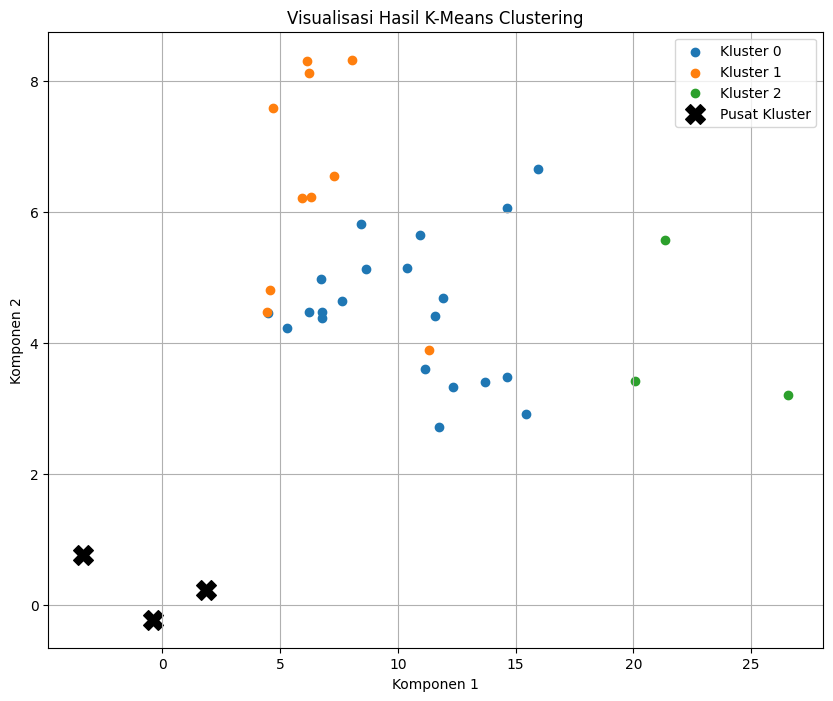

In [48]:
# Visualisasi hasil K-Means clustering
plt.figure(figsize=(10, 8))

# Plot data untuk setiap kluster dengan warna yang berbeda
for i in range(num_clusters_optimal):
    cluster_data = data_clustered[data_clustered['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Kluster {i}')

# Plot pusat kluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='black', label='Pusat Kluster')

plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.title('Visualisasi Hasil K-Means Clustering')
plt.legend()
plt.grid()
plt.show()